# Geospatial Data Analysis

This repository is based on Kaggle micro-course on geospatial data analysis and visualization using the *GeoPandas* library.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import pyogrio

### An Important Note of Warning
A .shp file extension must have its .shx, .prj or dbf in one folder. Otherwise, the geopandas engine responsible for reading a GIS file format will return an error when called.

> e.g. suppose the name of the file is data.shp, then its data.dbf and/or data.shx and/or data.prj must be located in the same folder

In [3]:
df = gpd.read_file("DEClands.shp").set_index("OBJECTID").sort_index()
df.head()


,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
OBJECTID,,,,,,,,,,,,,,,,,,,
1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/lands/7811.html#K_Detac...,DELAWARE RPP,5/12,STAMFORD,738.935321,103,N,None,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/lands/7811.html#K_Detac...,DELAWARE RPP,5/12,STAMFORD,282.673690,1218,N,None,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/lands/7811.html#K_Detac...,DELAWARE RPP,5/12,STAMFORD,234.391222,1780,N,None,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,https://www.dec.ny.gov/lands/7811.html#K_Detac...,GREENE RPP,5/12,STAMFORD,450.298499,2060,N,None,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
5,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/lands/7811.html#K_Detac...,"DELAWARE RPP, DECRP",9/14,STAMFORD,445.747086,634,N,None,1.803874e+06,7680.636755,"POLYGON ((487253.577 4641356.293, 486541.193 4..."


In [4]:
df.loc[:, 'CLASS'].value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [9]:
# select the important labels

data = df.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

data.head()

,CLASS,COUNTY,geometry
OBJECTID,,,
1,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
3,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
4,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
5,WILD FOREST,DELAWARE,"POLYGON ((487253.577 4641356.293, 486541.193 4..."


In [6]:
# rename the column label to lower case

# data = data.rename(str.lower, axis='columns')

In [10]:
# select land that fall under the "WILD FOREST" or "WILDERNESS"
wild_lands = data.loc[
  data.CLASS.isin(
    ['WILD FOREST', 'WILDERNESS']
    )
  ].copy()

# Visualization of GIS DATA 

using the plot method on a GIS formatted data containing the geometry attribute,


<Axes: >

<Figure size 6500x13000 with 0 Axes>

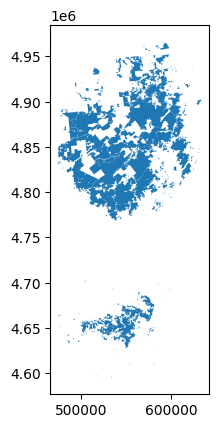

In [11]:
plt.figure(figsize=(10, 20), dpi=650)

wild_lands.plot(legend=True)

In [24]:
# campsites in new york

point_data = gpd.read_file("../datasets/Decptsofinterest.shp")
campsites = point_data.loc[point_data.ASSET.isin(['PRIMITIVE CAMPSITE'])]

# foot trail in NEW YORK

point_dat = gpd.read_file('../datasets/gdp_clean.csv')


0      False
1      False
2      False
3      False
4      False
       ...  
163    False
164    False
165    False
166    False
167    False
Name: geometry, Length: 168, dtype: bool

In [17]:
# the ASSET column contains the attributes of points (location) in New York

point_data.ASSET.value_counts()

PRIMITIVE CAMPSITE      1843
UNPAVED PARKING LOT     1574
LEAN-TO                  320
BOAT LAUNCH              162
PAVED PARKING LOT         90
PICNIC SITE               68
SCENIC VISTA              66
FIRE TOWER                32
PICNIC PAVILION           31
PICNIC TABLE              29
OBSERVATION PLATFORM      26
FISHING PIER              20
FISHING PLATFORM          14
FISHING ACCESS SITE       12
DAY USE AREA              11
EQUESTRIAN PLATFORM       11
OBSERVATION TOWER          7
VISITOR CENTER             1
Name: ASSET, dtype: int64

In [20]:
# select campsites location


<Axes: >

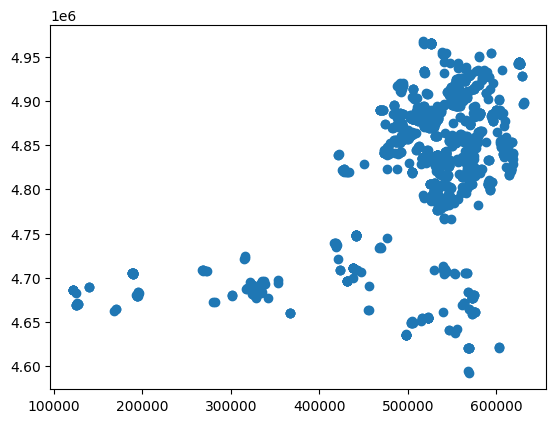

In [21]:
campsites.plot()